# Support Vector Machines

#### Giovanni Garifo - January 6, 2019

We want to train, evaluate and test some SVM models. With respect to the classification done with the Gaussian Naive Bayes classifier in the previous homework, this time we want to do some parameter tuning. To do so, the dataset will be splitted in a train set, a test set and a validation set. The latter will be used to evaluate the model with a different set of hyperparameters, in order to choose the set of parameters that gives the highest accuracy on the validation set. After the tuning on the validation set has been done, we'll check the performance of our model on the test set.

To reduce the code size and improve readability, I wrote some functions that will be used to perform common tasks in the homework, the first import of this notebook is in fact importing my self written library of utility functions.

Please note that in addition to this jupyter notebook, a standard python script implementation of this homework is available.

In [1]:
# Import functions from self written library
from mymllib import *

import numpy as np
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn import svm
import seaborn as sns

This variable can be used to mute or unmute some of the outputs of the script, we'll note mute any output in order to obtain all the plots.

In [2]:
NOT_MUTED = 0
MUTE_ALL = 1
MUTE_LINEAR = 2
MUTE_RBF_C = 3
MUTE_RBF_C_GAMMA = 4

mute_status = NOT_MUTED # mute / unmute the plots and some output

## Dataset  and hyperparameters preparation

Firstly we need to load the dataset, in this case we'll use the Iris dataset. We'll note use any dimensionality reduction technique (i.e. PCA), we'll just take the first two features of the dataset and discard the other two.

Then the dataset will be standardized, shuffled, and splitted into train (50%), validation (20%) and test (30%) sets.

In [3]:
iris_dataset = datasets.load_iris()
X = iris_dataset.data[:,0:2] # get only first two features for each sample
Y = iris_dataset.target # get labels

X_mi = np.mean(X) # mean of X
X_sigma = np.std(X) # standard deviation of X
X = (X-X_mi)/X_sigma # standardize the samples

print("Iris dataset loaded, only first two features selected\n")

# Split the datast into Train, Test and Evaluation sets, also shuffle the data before splitting
X_train, X_val, X_test, Y_train, Y_val, Y_test = splitDataIntoTVT(X, Y, train_perc = 0.5, val_perc = 0.2, test_perc = 0.3)


Iris dataset loaded, only first two features selected



Now let's make two lists of values for the two hyperparameters of the SVM that we want to tune: C and gamma.

The margin width of the SVM is directly proportional to 1/C, so for value of C >> 1 we'll get a narrow margin, this means that our model will behave like a small margin SVM, thus the decision boundary will depend only on fewer samples.

Instead, if 0 < C < 1, our model will behave like a large margin classifier, thus expanding the margin such that the decision boundary position will be influenced by more points.

This means that if we choose a small margin (large C), we don't trust that our data are well separated, so it will be difficult to classify them, and in this case, a small margin will help. But if the margin is too small, it could be impractical to separate the classes using too few samples as support vectors.

The Gamma parameter is specific for the SVM that uses an RBF kernel, it defines the distance of influence of each sample. 

In [4]:
C_list, Gamma_list = createHyperparametersLists(-3, 4, -3, 4)

C values:  [0.001, 0.01, 0.1, 1, 10, 100, 1000] 

Gamma values:  [0.001, 0.01, 0.1, 1, 10, 100, 1000] 





## Linear SVM

### Model training and evaluation

Now we'll train and evaluate a model for each value of C in our hyperparameter list. We want to choose the "C" that gives the highest accuracy when predicting the labels of the evaluation set.

If more than one C gives the same accuracy, we choose the lowest C, so the one that gives the larger margin.

In [5]:
# train models and do evaluation step to obtain the value of C that gives highest accuracy
models, accuracy_list, highest_accuracy = applySVM_C(
    'linear', # kernel used
    C_list, # list of C values to use as hyperparameter for modelling
    X_train, Y_train, # train set
    X_val, Y_val, # evaluation set
    mute_status) 


Performing fit on train set and predict on evaluation set for C = 0.001
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy: 0.238 

Performing fit on train set and predict on evaluation set for C = 0.01
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy: 0.238 

Performing fit on train set and predict on evaluation set for C = 0.1
 -> Percentage of mislabeled points: 47.6%
 -> Gives a mean accuracy: 0.524 

Performing fit on train set and predict on evaluation set for C = 1
 -> Percentage of mislabeled points: 19.0%
 -> Gives a mean accuracy: 0.810 

Performing fit on train set and predict on evaluation set for C = 10
 -> Percentage of mislabeled points: 14.3%
 -> Gives a mean accuracy: 0.857 

Performing fit on train set and predict on evaluation set for C = 100
 -> Percentage of mislabeled points: 9.5%
 -> Gives a mean accuracy: 0.905 

Performing fit on train set and predict on evaluation set for C = 1000
 -> Percentage of mislabeled points: 9.5%


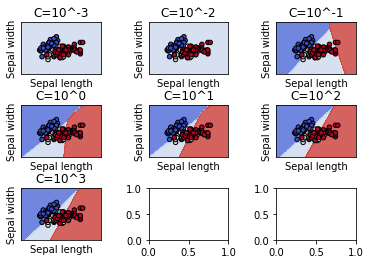

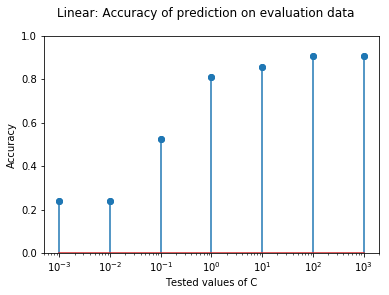

In [6]:
# plot models and their accuracy on evaluation set
if mute_status != MUTE_LINEAR and mute_status != MUTE_ALL :
    plotModels(0, X, Y, models)
    plotAccuracyComparison(1, C_list, accuracy_list, "Tested values of C", "Linear: Accuracy of prediction on evaluation data")


In [7]:
# find best values of C (they can be more then one!), 
# the ones with the highest accuracy
C_best = selectBestC(C_list, accuracy_list, highest_accuracy)
        

Highest accuracy = 0.905 , obtained for C =
-> 100
-> 1000
Selecting as C_best:  100


As we can se from the above graph, the accuracy is increasing for higher values of C, the model with the highest accuracy is in fact a small margin SVM: This means that the sample are not clearly linearly separable.


### Model testing

Now that we found the best value for the C parameter of the linear SVM, we can test our model on the test set:

Performing fit on train set and predict on evaluation set for C = 100
 -> Percentage of mislabeled points: 22.2%
 -> Gives a mean accuracy: 0.778 



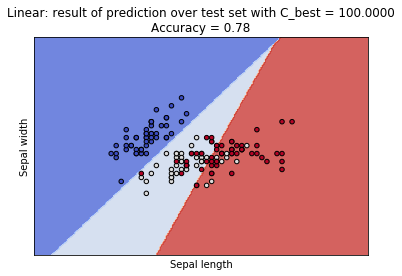

In [8]:
models, accuracy_list, accuracy = applySVM_C(
    'linear', # kernel used
    [C_best], # use only C_best as C value for the list
    X_train, Y_train, # train set
    X_test, Y_test, # test set
    NOT_MUTED) 

# plot model and accuracy for prediction on TEST data
if mute_status != MUTE_LINEAR and mute_status != MUTE_ALL :
    plotModel(2, X, Y, models[0], "Linear: result of prediction over test set with C_best = %.4f" % C_best + "\nAccuracy = %.2f" % accuracy)


The accuracy on the test set is lower then the one we expected, a possible cause can be instrinsic in our evaluation technique: we are using too less samples to evaluate the model, a better result can be achieved using more advanced techniques, such as the one based on crossvalidation, as we'll see later.


## RBF SVM: only parameter C tuning

Now we'll train and evaluate a SVM that uses the Radial Basis Function kernel instead of the linear one.

As for the linear kernel, we'll search the value of C that gives the highest accuracy.

### Model training and evaluation

In [9]:
models, accuracy_list, highest_accuracy = applySVM_C(
    'rbf', # kernel used
    C_list, # list of C values to use as hyperparameter for modelling
    X_train, Y_train, # train set
    X_val, Y_val, # evaluation set
    mute_status) 

Performing fit on train set and predict on evaluation set for C = 0.001
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy: 0.238 

Performing fit on train set and predict on evaluation set for C = 0.01
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy: 0.238 

Performing fit on train set and predict on evaluation set for C = 0.1
 -> Percentage of mislabeled points: 61.9%
 -> Gives a mean accuracy: 0.381 

Performing fit on train set and predict on evaluation set for C = 1
 -> Percentage of mislabeled points: 19.0%
 -> Gives a mean accuracy: 0.810 

Performing fit on train set and predict on evaluation set for C = 10
 -> Percentage of mislabeled points: 19.0%
 -> Gives a mean accuracy: 0.810 

Performing fit on train set and predict on evaluation set for C = 100
 -> Percentage of mislabeled points: 9.5%
 -> Gives a mean accuracy: 0.905 

Performing fit on train set and predict on evaluation set for C = 1000
 -> Percentage of mislabeled points: 9.5%


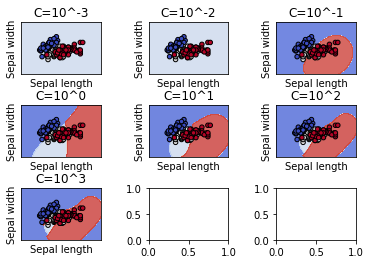

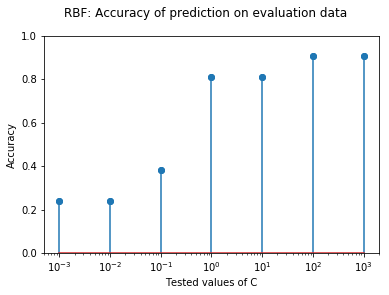

In [10]:
if mute_status != MUTE_RBF_C and mute_status != MUTE_ALL:
    plotModels(4, X, Y, models)
    plotAccuracyComparison(5, C_list, accuracy_list, "Tested values of C", "RBF: Accuracy of prediction on evaluation data")


In [11]:
C_best = selectBestC(C_list, accuracy_list, highest_accuracy)

Highest accuracy = 0.905 , obtained for C =
-> 100
-> 1000
Selecting as C_best:  100


Also in this case, the highest accuracy is reached for the highest value of C.


### Model testing

Now we can test the SVM with the RBF kernel on the test set, using as value of C the best one we just found.

Performing fit on train set and predict on evaluation set for C = 100
 -> Percentage of mislabeled points: 26.7%
 -> Gives a mean accuracy: 0.733 



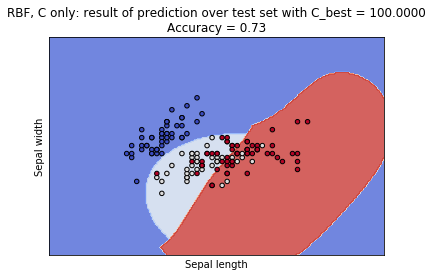

In [12]:
models, accuracy_list, accuracy = applySVM_C(
    'rbf', # kernel used
    [C_best], # use only C_best as C value for the list
    X_train, Y_train, # train set
    X_test, Y_test, # test set
    NOT_MUTED) 

# plot model and accuracy for prediction on TEST data
if mute_status != MUTE_RBF_C and mute_status != MUTE_ALL :
    plotModel(6, X, Y, models[0], "RBF, C only: result of prediction over test set with C_best = %.4f" % C_best + "\nAccuracy = %.2f" % accuracy)


Also this time we got an accuracy that is worse with respect to the one found during the evaluation. Now let's try to tune not only one, but two hyperparameters in order to improve the accuracy of our model.


## RBF SVM: C and Gamma tuning

Now we'll train a SVM that uses the RBF kernel, and we'll choose the best hyperparameters C and Gamma that give us the highest accuracy when predicting the labels.

We need to train and test a SVM for each couple of parameters, performing a grid search over the accuracies obtained by each model, and selecting the values of C and Gamma used by the model that performed the best.

### Model training and evaluation

In [13]:
C_list, Gamma_list = createHyperparametersLists(-4, 6, -4, 6)

C values:  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] 

Gamma values:  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] 





In [14]:
# train models and do evaluation step to obtain the values of C and Gamma that gives highest accuracy
models, hyperparameters, highest_accuracy = applySVM_C_Gamma(
    'rbf', # kernel used
    C_list, # list of C values to use as hyperparameter for modelling
    Gamma_list, # list of Gamma values to use as hyperparameter for modelling
    X_train, Y_train, # train set
    X_val, Y_val, # evaluation set
    mute_status) 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.0001
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy of: 0.238 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.001
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy of: 0.238 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.01
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy of: 0.238 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.1
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy of: 0.238 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 1
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy of: 0.238 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 10
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy of: 0.238 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 100
 -> Percentage

 -> Percentage of mislabeled points: 14.3%
 -> Gives a mean accuracy of: 0.857 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10
 -> Percentage of mislabeled points: 28.6%
 -> Gives a mean accuracy of: 0.714 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100
 -> Percentage of mislabeled points: 28.6%
 -> Gives a mean accuracy of: 0.714 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 1000
 -> Percentage of mislabeled points: 61.9%
 -> Gives a mean accuracy of: 0.381 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10000
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100000
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 



In [15]:
# find best values of hyperparameters, the ones that guarantees highest accuracy
C_best, Gamma_best = selectBestHyperparameters(C_list, Gamma_list, hyperparameters, highest_accuracy)


------------------------------------------------
Highest accuracy = 0.905 , obtained for hyperparameters =
-> C= 1 , Gamma= 10
-> C= 10 , Gamma= 1
-> C= 100 , Gamma= 1
-> C= 10000 , Gamma= 0.1
-> C= 100000 , Gamma= 0.0001
-> C= 100000 , Gamma= 0.1
Selecting as best Hyperparameters: C= 1 , Gamma= 10


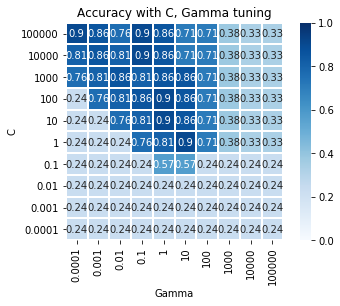

In [16]:
# plot heat map of hyperparamenters
if mute_status != MUTE_RBF_C_GAMMA and mute_status != MUTE_ALL :
    plotHeatmap(8, C_list, Gamma_list, hyperparameters, "Accuracy with C, Gamma tuning")

This time we plotted an heatmap that shows the accuracy obtained by each model trained with a different couple of parameters. As we can see from the plot there is a specific region of the heatmap populated by high accuracy values: also in this case, a very small value of C doesn't works well to classify our samples. Moreover, an high value of Gamma isn't working very well, even if we have an high value for C.

### Model testing

Now that we have choosen the best values for Gamma and C, we can train a model with this parameters and test it on the test set.

Performing fit and predict for RBF SVM with C = 1 and Gamma = 10
 -> Percentage of mislabeled points: 22.2%
 -> Gives a mean accuracy of: 0.778 



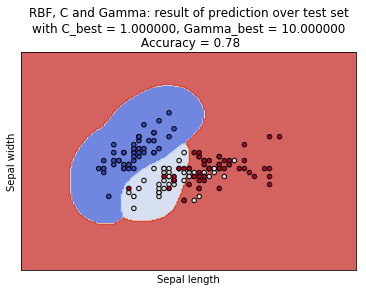

In [17]:
# test model
models, hyperparameters, accuracy = applySVM_C_Gamma(
    'rbf', # kernel used
    [C_best], 
    [Gamma_best],
    X_train, Y_train, # train set
    X_test, Y_test, # test set
    NOT_MUTED) 

# plot model and accuracy for prediction on TEST data
if mute_status != MUTE_RBF_C_GAMMA and mute_status != MUTE_ALL :
    plotModel(
        9, #fignum 
        X, Y, #dataset
        models[0], 
        "RBF, C and Gamma: result of prediction over test set\nwith C_best = %.6f" % C_best + 
        ", Gamma_best = %.6f" % Gamma_best + "\n Accuracy = %.2f" % accuracy
    )


With no surprise, we are not getting the accuracy value we expected. The reason remains the same: we are evaluating the models on only 20% of the available samples, with a small dataset like the one we used, this means that we are using too less data to decide which values of the hyperparameters to use to tune our models, moreover, the tuning highly depend on the shuffling of the data.



## RBF SVM: C and Gamma tuning with K-fold crossvalidation

Now we'll use the K-fold crossvalidation technique to validate our models. A usual, we want to find the values of C and Gamma that give us the highest accuracy.

By using crossvalidation, we are not splitting the dataset into three parts, but we are splitting it only into a training set and a test set. The training set will then be splitted into a number of "K" different sets, called "folds", and we'll perform K rounds of training and evaluation, each time training on K-1 folds, and testing on the remaining fold.

This will allow to perform the validation more in depth, by using more samples. We have a chance that by doing this we'll tune the model with the right parameters.

### Model training and crossvalidation

We'll first divide the dataset into training and test sets, then we'll split the training set into K=5 folds.

In [18]:
# split data only into train and test set, also shuffle the data before splitting
X_train, X_test, Y_train, Y_test = splitDataIntoTVT(X, Y, train_perc = 0.7, val_perc = 0.0, test_perc = 0.3)

# new values for C and Gamma
C_list, Gamma_list = createHyperparametersLists(-4, 6, -4, 6)

# generate K subsets from the training set
K = 5
fold_len = int(len(X_train)/K) #length of each fold
X_folds_list = []
Y_folds_list = []

for i in range(K-1):
    X_folds_list += [X_train[i*fold_len:(i+1)*fold_len]]
    Y_folds_list += [Y_train[i*fold_len:(i+1)*fold_len]]

# the last remaining fold, take all the remaing samples
X_folds_list += [X_train[(K-1)*fold_len:len(X_train)]] 
Y_folds_list +=[Y_train[(K-1)*fold_len:len(X_train)]]


C values:  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] 

Gamma values:  [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000] 





In [19]:
#For each fold, fit the model on the other (k-1) folds and evaluate on the current fold to gain statistics
hyperparameters_list = []

for k in range(K):

    # list of folds that we'll use as training data
    X_folds_train_list = []
    Y_folds_train_list = []

    #compose training data for the current setep, put together k-1 folds
    for i in range(K):
        if i!=k:
            X_folds_train_list.append(X_folds_list[i])
            Y_folds_train_list.append(Y_folds_list[i])
    
    #convert list to array
    X_folds_train = np.concatenate(X_folds_train_list, axis=0)
    Y_folds_train = np.concatenate(Y_folds_train_list, axis=0)

    #train and evaluate the model to obtain hyperparameters accuracy for this training and evaluation set
    models, hyperparameters, highest_accuracy = applySVM_C_Gamma(
        'rbf', # kernel used
        C_list, # list of C values to use as hyperparameter for modelling
        Gamma_list, # list of Gamma values to use as hyperparameter for modelling
        X_folds_train, Y_folds_train, # train set: all the folds, minus the k-th one
        X_folds_list[k], Y_folds_list[k], # evaluation set: the k-th fold
        mute_status)
    
    #save hyperparameters accuracy for k-th fold
    hyperparameters_list.append(hyperparameters)


Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.0001
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.001
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.01
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.1
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 1
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 10
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 100
 -> Percentage

 -> Percentage of mislabeled points: 38.1%
 -> Gives a mean accuracy of: 0.619 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10
 -> Percentage of mislabeled points: 33.3%
 -> Gives a mean accuracy of: 0.667 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100
 -> Percentage of mislabeled points: 28.6%
 -> Gives a mean accuracy of: 0.714 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 1000
 -> Percentage of mislabeled points: 61.9%
 -> Gives a mean accuracy of: 0.381 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10000
 -> Percentage of mislabeled points: 61.9%
 -> Gives a mean accuracy of: 0.381 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100000
 -> Percentage of mislabeled points: 61.9%
 -> Gives a mean accuracy of: 0.381 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.0001
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 


 -> Percentage of mislabeled points: 42.9%
 -> Gives a mean accuracy of: 0.571 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10
 -> Percentage of mislabeled points: 33.3%
 -> Gives a mean accuracy of: 0.667 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100
 -> Percentage of mislabeled points: 33.3%
 -> Gives a mean accuracy of: 0.667 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 1000
 -> Percentage of mislabeled points: 52.4%
 -> Gives a mean accuracy of: 0.476 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10000
 -> Percentage of mislabeled points: 52.4%
 -> Gives a mean accuracy of: 0.476 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100000
 -> Percentage of mislabeled points: 52.4%
 -> Gives a mean accuracy of: 0.476 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.0001
 -> Percentage of mislabeled points: 76.2%
 -> Gives a mean accuracy of: 0.238 


 -> Percentage of mislabeled points: 9.5%
 -> Gives a mean accuracy of: 0.905 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10
 -> Percentage of mislabeled points: 9.5%
 -> Gives a mean accuracy of: 0.905 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100
 -> Percentage of mislabeled points: 9.5%
 -> Gives a mean accuracy of: 0.905 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 1000
 -> Percentage of mislabeled points: 52.4%
 -> Gives a mean accuracy of: 0.476 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10000
 -> Percentage of mislabeled points: 52.4%
 -> Gives a mean accuracy of: 0.476 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100000
 -> Percentage of mislabeled points: 52.4%
 -> Gives a mean accuracy of: 0.476 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.0001
 -> Percentage of mislabeled points: 66.7%
 -> Gives a mean accuracy of: 0.333 

Pe

 -> Percentage of mislabeled points: 33.3%
 -> Gives a mean accuracy of: 0.667 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10
 -> Percentage of mislabeled points: 23.8%
 -> Gives a mean accuracy of: 0.762 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100
 -> Percentage of mislabeled points: 33.3%
 -> Gives a mean accuracy of: 0.667 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 1000
 -> Percentage of mislabeled points: 52.4%
 -> Gives a mean accuracy of: 0.476 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10000
 -> Percentage of mislabeled points: 52.4%
 -> Gives a mean accuracy of: 0.476 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100000
 -> Percentage of mislabeled points: 52.4%
 -> Gives a mean accuracy of: 0.476 

Performing fit and predict for RBF SVM with C = 0.0001 and Gamma = 0.0001
 -> Percentage of mislabeled points: 42.9%
 -> Gives a mean accuracy of: 0.571 


 -> Percentage of mislabeled points: 33.3%
 -> Gives a mean accuracy of: 0.667 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10
 -> Percentage of mislabeled points: 42.9%
 -> Gives a mean accuracy of: 0.571 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100
 -> Percentage of mislabeled points: 33.3%
 -> Gives a mean accuracy of: 0.667 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 1000
 -> Percentage of mislabeled points: 57.1%
 -> Gives a mean accuracy of: 0.429 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 10000
 -> Percentage of mislabeled points: 57.1%
 -> Gives a mean accuracy of: 0.429 

Performing fit and predict for RBF SVM with C = 100000 and Gamma = 100000
 -> Percentage of mislabeled points: 57.1%
 -> Gives a mean accuracy of: 0.429 




------------------------------------------------
Highest accuracy = 0.790 , obtained for hyperparameters =
-> C= 1000 , Gamma= 0.01
-> C= 10000 , Gamma= 0.001
-> C= 100000 , Gamma= 0.0001
Selecting as best Hyperparameters: C= 1000 , Gamma= 0.01


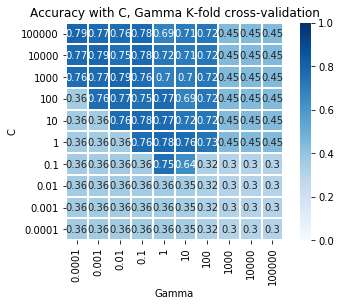

In [20]:
# Among all combinations of C and Gamma, compute the average accuracy of the K validation
hyperparameters_avg = np.empty(shape=(len(C_list), len(Gamma_list))) 
highest_accuracy = 0

for c in C_list:
    for gamma in Gamma_list:
            accuracy_sum = 0.0
            accuracy_count = 0.0
            
            for hp in hyperparameters_list:
                accuracy_sum += hp[C_list.index(c), Gamma_list.index(gamma)]
                accuracy_count += 1.0

            accuracy_avg = accuracy_sum/accuracy_count
            hyperparameters_avg[C_list.index(c), Gamma_list.index(gamma)] = accuracy_avg

            if accuracy_avg>highest_accuracy:
                highest_accuracy = accuracy_avg

#check
assert(hyperparameters_avg[0,0] == 
    (hyperparameters_list[0][0][0] 
    + hyperparameters_list[1][0][0] 
    + hyperparameters_list[2][0][0] 
    + hyperparameters_list[3][0][0]
    + hyperparameters_list[4][0][0])
    /5.0
)

C_best, Gamma_best = selectBestHyperparameters(C_list, Gamma_list, hyperparameters_avg, highest_accuracy)

if mute_status != MUTE_RBF_C_GAMMA and mute_status != MUTE_ALL :
    plotHeatmap(10, C_list, Gamma_list, hyperparameters_avg, "Accuracy with C, Gamma K-fold cross-validation")



### Model testing

Now we are ready to train a model with the best C and Gamma that we found and test it on the test set.

Performing fit and predict for RBF SVM with C = 1000 and Gamma = 0.01
 -> Percentage of mislabeled points: 17.8%
 -> Gives a mean accuracy of: 0.822 



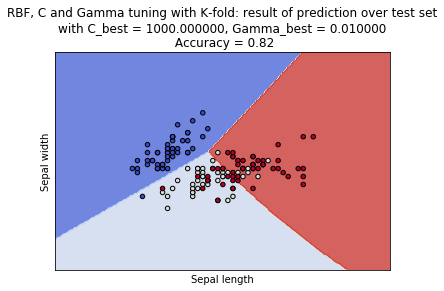

In [22]:
# test model
models, hyperparameters, accuracy = applySVM_C_Gamma(
    'rbf', # kernel used
    [C_best], 
    [Gamma_best],
    X_train, Y_train, # train set
    X_test, Y_test, # test set
    NOT_MUTED) 

# plot model and accuracy for prediction on TEST data
if mute_status != MUTE_RBF_C_GAMMA and mute_status != MUTE_ALL :
    plotModel(
        11, #fignum 
        X, Y, #dataset
        models[0], 
        "RBF, C and Gamma tuning with K-fold: result of prediction over test set\nwith C_best = %.6f" % C_best + 
        ", Gamma_best = %.6f" % Gamma_best + "\n Accuracy = %.2f" % accuracy
    )


Finally, we obtained an accuracy on par with the one obtained during the evaluation, it's even higher! As we said, this is because we are deciding which parameters to use by performing a much deeper analysis: thanks to the crossvalidation technique, we are using near four times more samples to evaluate the models.